In [5]:
from nnlearn.Network import *


In [6]:
#creating network with 2 hidden layers

np.random.seed(100)

test_net_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    activation_layer(10),
    
    connected_layer(num_neurons = 2, prev_neurons = 10)
    
]

test_net = network(test_net_layers)

In [7]:
#creating data points to learn

x = np.random.uniform(-2,2,(1000,2))

y = np.array([[s[0]*s[1], s[0] + s[1]] for s in x])

In [8]:
test_net.fit(x, y, epochs = 100)

--------------------
epoch: 1 
 loss: 2.2026
--------------------
epoch: 21 
 loss: 1.1819
--------------------
epoch: 41 
 loss: 0.9187
--------------------
epoch: 61 
 loss: 0.8986
--------------------
epoch: 81 
 loss: 0.8858
--------------------
epoch: 100 
 loss: 0.8709


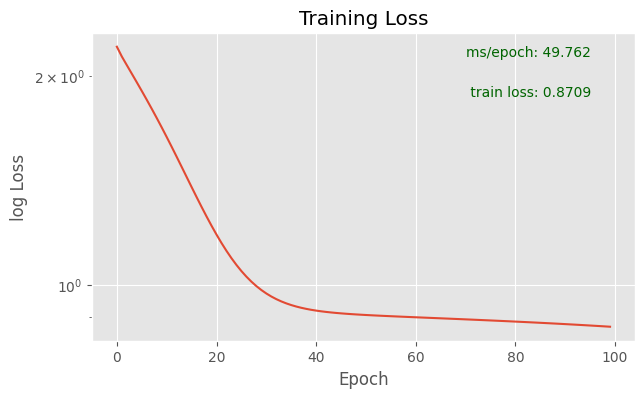

In [9]:
test_net.graph_loss_history()